In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for repeatability
np.random.seed(42)

def generate_call_center_data(start_date='2020-01-01', years=5):
    """
    Generate non-homogeneous call center data with specific patterns.
    
    Parameters:
    - start_date: Starting date for the data
    - years: Number of years to generate
    
    Returns:
    - DataFrame with date, call_time, day_of_week, and call_counts
    """
    
    # Generate date range (only weekdays)
    start = pd.to_datetime(start_date)
    end = start + timedelta(days=365 * years)
    
    # Create all dates first
    all_dates = pd.date_range(start=start, end=end, freq='D')
    
    # Filter to weekdays only (Monday=0 to Friday=4)
    weekday_dates = [d for d in all_dates if d.weekday() < 5]
    
    # Create base dataframe with morning and afternoon for each weekday
    data = []
    for date in weekday_dates:
        for period in ['Morning', 'Afternoon']:
            data.append({
                'date': date,
                'period': period,
                'day_of_week': date.day_name()
            })
    
    df = pd.DataFrame(data)
    
    # Calculate base call counts with multiple factors
    call_counts = []
    
    for idx, row in df.iterrows():
        date = row['date']
        call_time = row['period']
        day_of_week = date.weekday()  # 0=Monday, 4=Friday
        month = date.month
        
        # Base call volume
        base_calls = 1000
        
        # 1. Day of week effect (Monday highest, decreasing through Friday)
        # Monday: 1.2x, Tuesday: 1.1x, Wednesday: 1.0x, Thursday: 0.9x, Friday: 0.8x
        day_multipliers = {0: 1.20, 1: 1.10, 2: 1.00, 3: 0.90, 4: 0.80}
        day_factor = day_multipliers[day_of_week]
        
        # 2. Time of day effect (Morning: 1.3x, Afternoon: 0.7x)
        time_factor = 1.3 if period == 'Morning' else 0.7
        
        # 3. Seasonality effect with peaks and ramp ups/downs
        # Create smooth transitions into and out of peak months
        if month in [7, 8]:  # July-August peak
            seasonal_factor = 1.5
        elif month == 6:  # June - ramping up
            seasonal_factor = 1.3
        elif month == 9:  # September - ramping down
            seasonal_factor = 1.3
        elif month in [1, 2]:  # January-February minor peak
            seasonal_factor = 1.25
        elif month == 12:  # December - ramping up to Jan/Feb
            seasonal_factor = 1.15
        elif month == 3:  # March - ramping down
            seasonal_factor = 1.10
        elif month in [4, 5]:  # April-May - soft period ramping to summer
            seasonal_factor = 0.85 + (month - 4) * 0.1  # 0.85 to 0.95
        elif month in [10, 11]:  # October-November - soft period
            seasonal_factor = 0.80
        else:
            seasonal_factor = 1.0
        
        # 4. Add some year-over-year growth (2% annually)
        year_factor = 1.0 + (0.02 * (date.year - start.year))
        
        # Calculate expected calls
        expected_calls = base_calls * day_factor * time_factor * seasonal_factor * year_factor
        
        # 5. Add random noise (±15% variability)
        noise = np.random.normal(1.0, 0.15)
        actual_calls = int(expected_calls * noise)
        
        # Ensure non-negative
        actual_calls = max(0, actual_calls)
        
        call_counts.append(actual_calls)
    
    df['call_counts'] = call_counts
    
    # Sort by date and call_time
    df = df.sort_values(['date', 'period']).reset_index(drop=True)
    
    return df


# Generate the data
df_calls = generate_call_center_data(start_date='2020-01-01', years=5) 

In [0]:
def find_lambdas_for_next_week(df_calls, month):
    """
    Calculate Poisson probabilities for a given lambda and outcome x
    
    Parameters:
    - df_calls: dataframe for call data. This includes day of the week, date of the call volume, and call counts.
    - month: month to analyze
    
    Returns:
    - dictionary of day of week and expected calls
     
    """

    df_calls['year'] = df_calls['date'].dt.year

    df_calls['month'] = df_calls['date'].dt.month

    df_average = df_calls.groupby(['month', 'day_of_week'])['call_counts'].mean().reset_index()

    df_average['call_counts'] = np.ceil(df_average['call_counts'])

    month_avg = df_average[df_average['month']==month]

    result_dict = month_avg.set_index('day_of_week')['call_counts'].to_dict()
    
    return result_dict

dataframe_for_call_averages = find_lambdas_for_next_week(df_calls,11)    

friday_call_counts =dataframe_for_call_averages['Friday']
thursday_call_counts =dataframe_for_call_averages['Thursday']
wednesday_call_counts =dataframe_for_call_averages['Wednesday']
tuesday_call_counts =dataframe_for_call_averages['Tuesday']
monday_call_counts =dataframe_for_call_averages['Monday']


Monday: Average 713.0, analyzing x = 550 calls


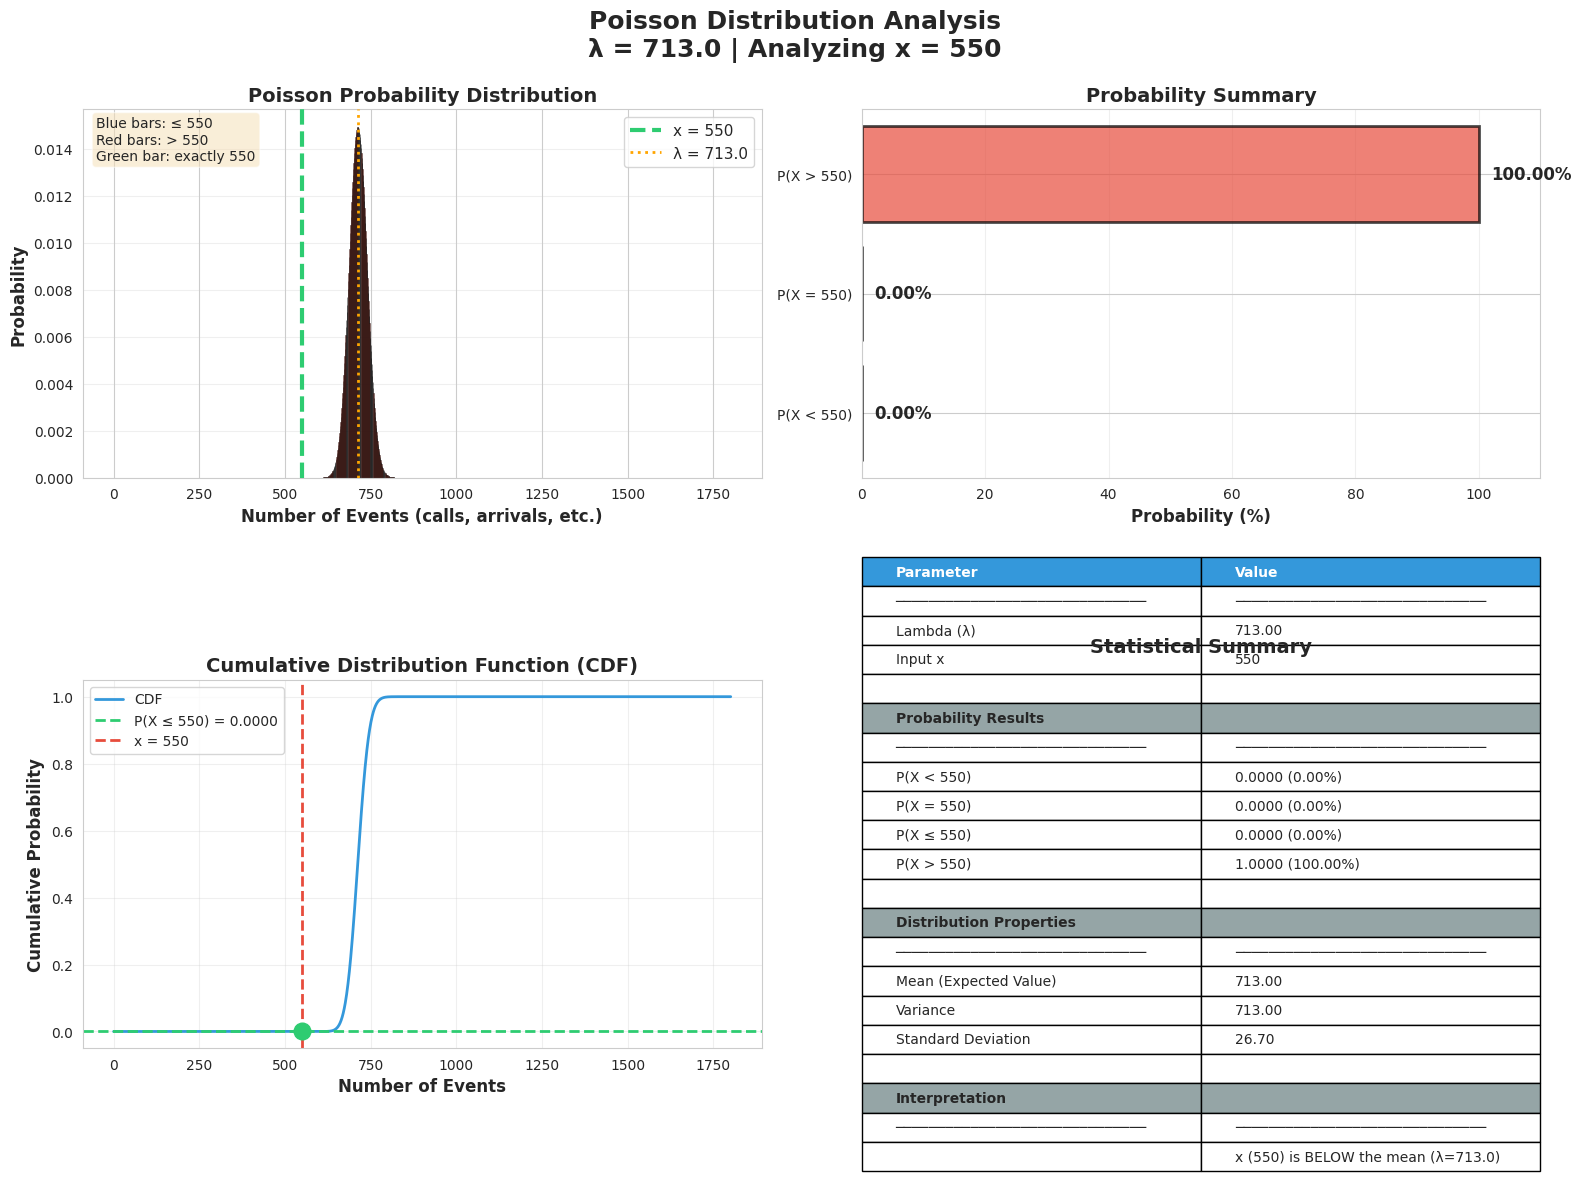

POISSON PROBABILITY CALCULATOR

Inputs:
  Lambda (λ): 713.0
  x value: 550

--------------------------------------------------------------------------------
PROBABILITY RESULTS:
--------------------------------------------------------------------------------
  P(X < 550)  = 0.000000  (0.0000%)
  P(X = 550)  = 0.000000  (0.0000%)
  P(X ≤ 550)  = 0.000000  (0.0000%)
  P(X > 550)  = 1.000000  (100.0000%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
  • There is a 0.00% chance of getting LESS than 550 events
  • There is a 100.00% chance of getting MORE than 550 events
  • The probability of getting exactly 550 events is 0.00%


Tuesday: Average {tuesday_call_counts}, analyzing x = 600 calls


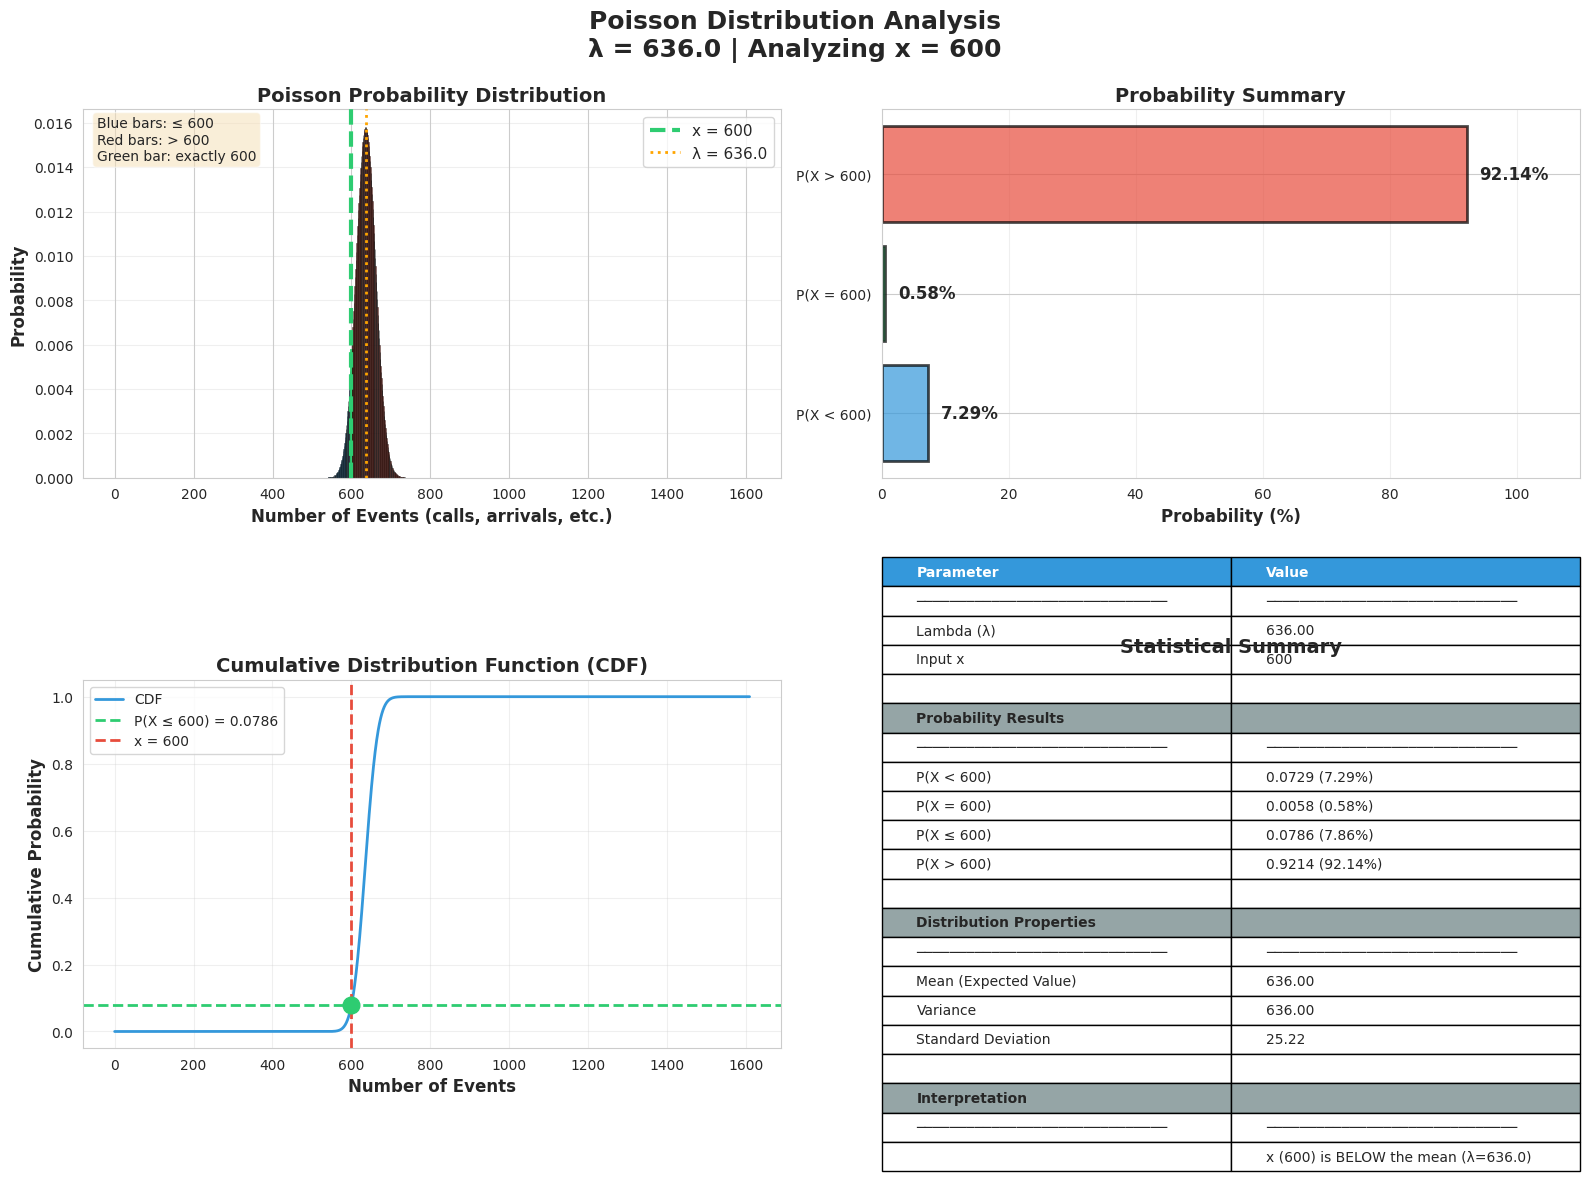

POISSON PROBABILITY CALCULATOR

Inputs:
  Lambda (λ): 636.0
  x value: 600

--------------------------------------------------------------------------------
PROBABILITY RESULTS:
--------------------------------------------------------------------------------
  P(X < 600)  = 0.072858  (7.2858%)
  P(X = 600)  = 0.005764  (0.5764%)
  P(X ≤ 600)  = 0.078622  (7.8622%)
  P(X > 600)  = 0.921378  (92.1378%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
  • There is a 7.29% chance of getting LESS than 600 events
  • There is a 92.14% chance of getting MORE than 600 events
  • The probability of getting exactly 600 events is 0.58%


Wednesday: Average {wednesday_call_counts}, analyzing x = 525 calls


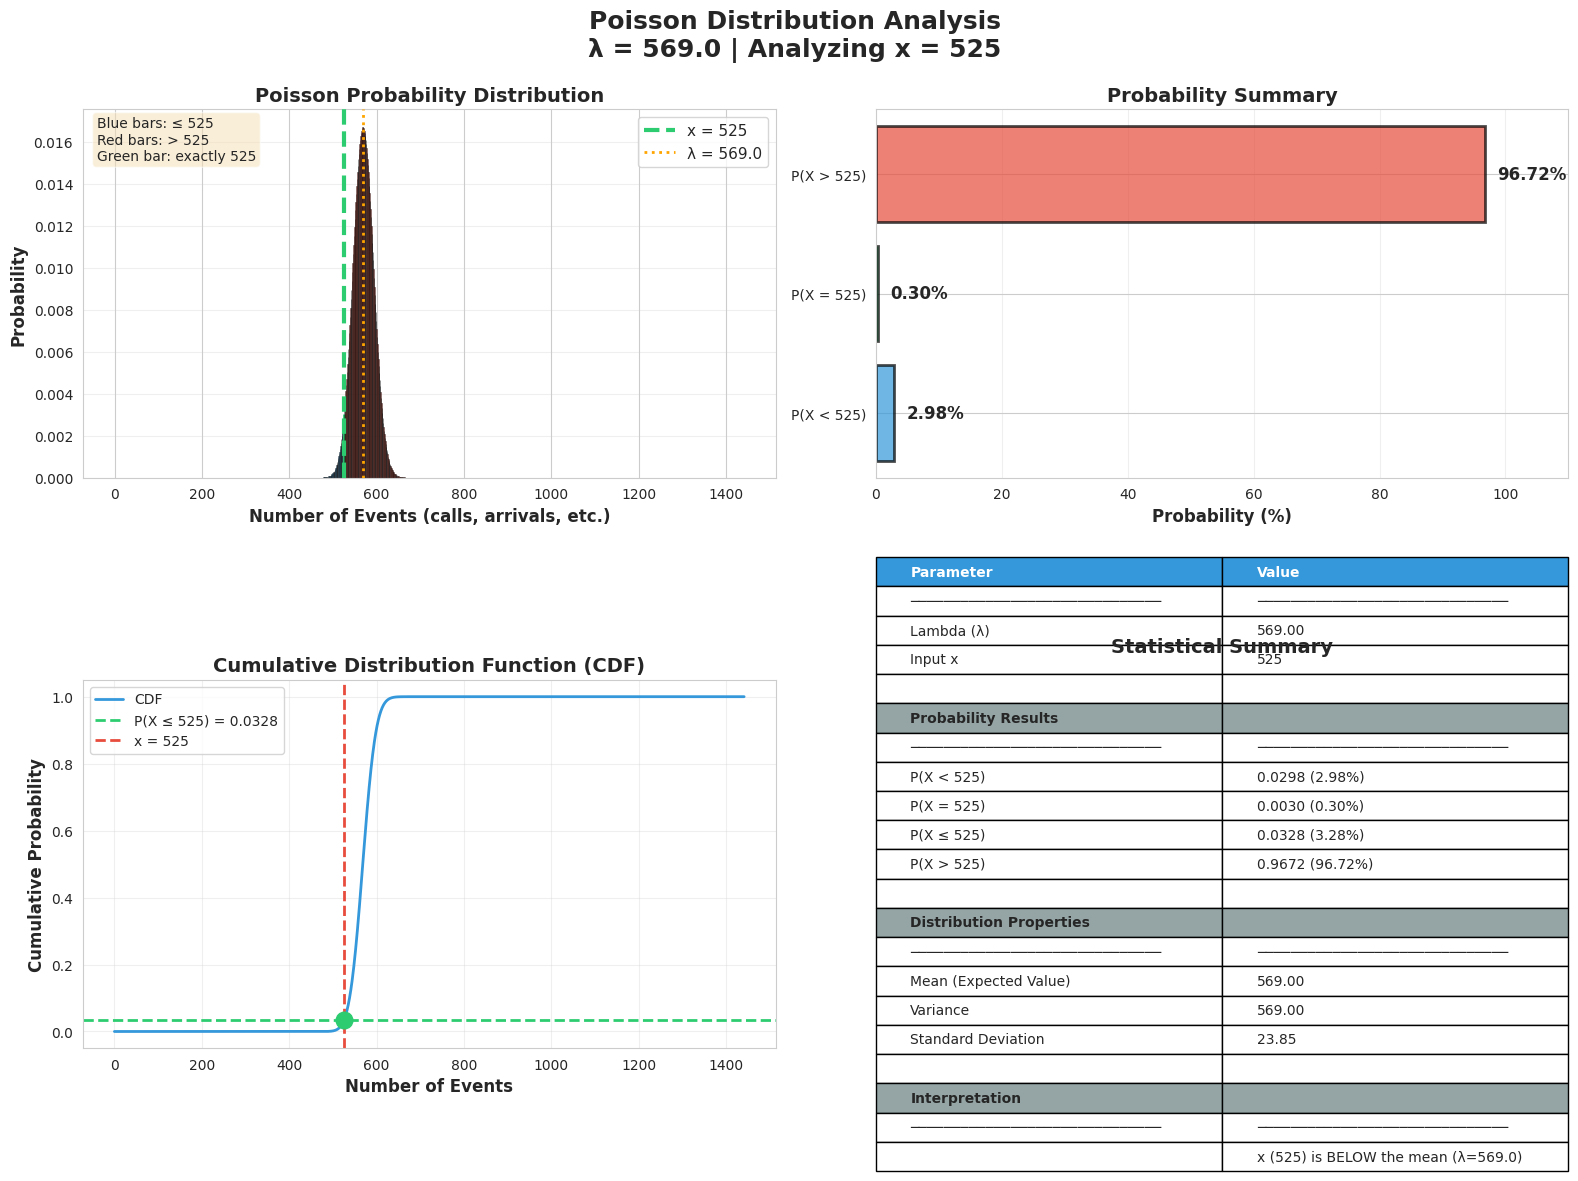

POISSON PROBABILITY CALCULATOR

Inputs:
  Lambda (λ): 569.0
  x value: 525

--------------------------------------------------------------------------------
PROBABILITY RESULTS:
--------------------------------------------------------------------------------
  P(X < 525)  = 0.029810  (2.9810%)
  P(X = 525)  = 0.003035  (0.3035%)
  P(X ≤ 525)  = 0.032844  (3.2844%)
  P(X > 525)  = 0.967156  (96.7156%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
  • There is a 2.98% chance of getting LESS than 525 events
  • There is a 96.72% chance of getting MORE than 525 events
  • The probability of getting exactly 525 events is 0.30%


Thursday: Average {thursday_call_counts}, analyzing x = 400 calls


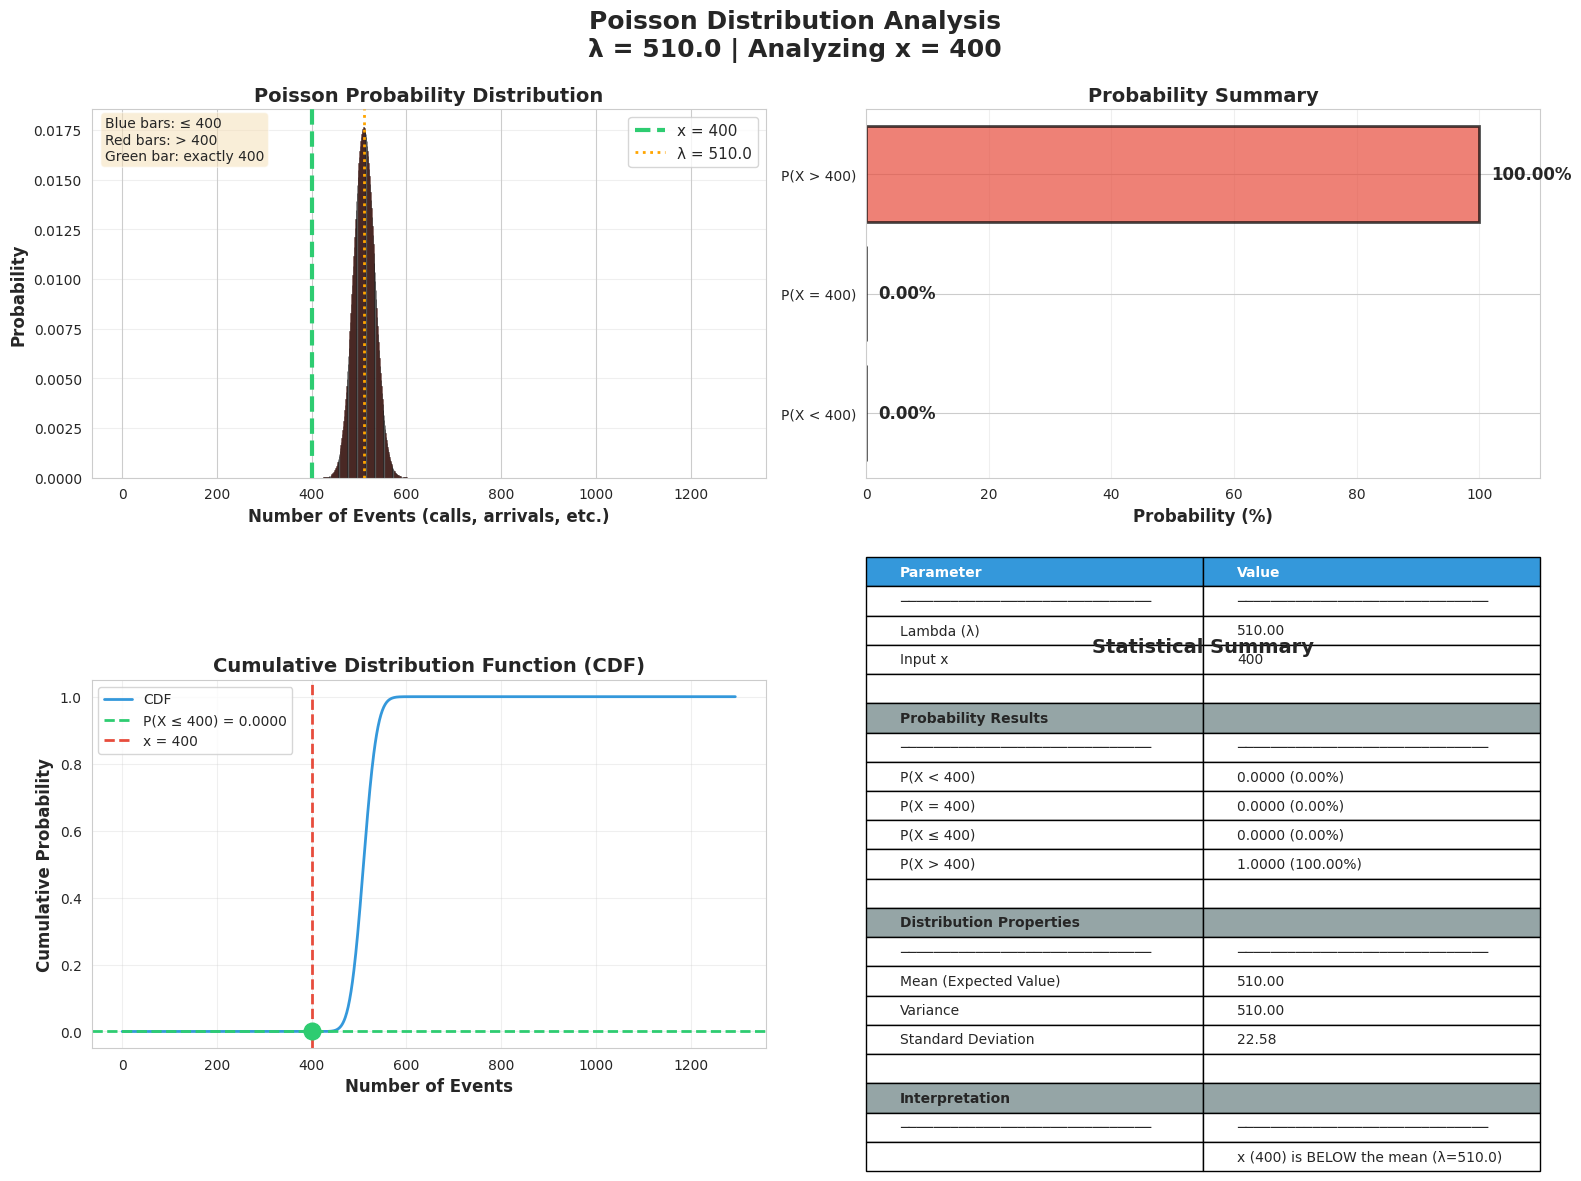

POISSON PROBABILITY CALCULATOR

Inputs:
  Lambda (λ): 510.0
  x value: 400

--------------------------------------------------------------------------------
PROBABILITY RESULTS:
--------------------------------------------------------------------------------
  P(X < 400)  = 0.000000  (0.0000%)
  P(X = 400)  = 0.000000  (0.0000%)
  P(X ≤ 400)  = 0.000000  (0.0000%)
  P(X > 400)  = 1.000000  (100.0000%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
  • There is a 0.00% chance of getting LESS than 400 events
  • There is a 100.00% chance of getting MORE than 400 events
  • The probability of getting exactly 400 events is 0.00%


Friday: Average 469.0, analyzing x = 500 calls


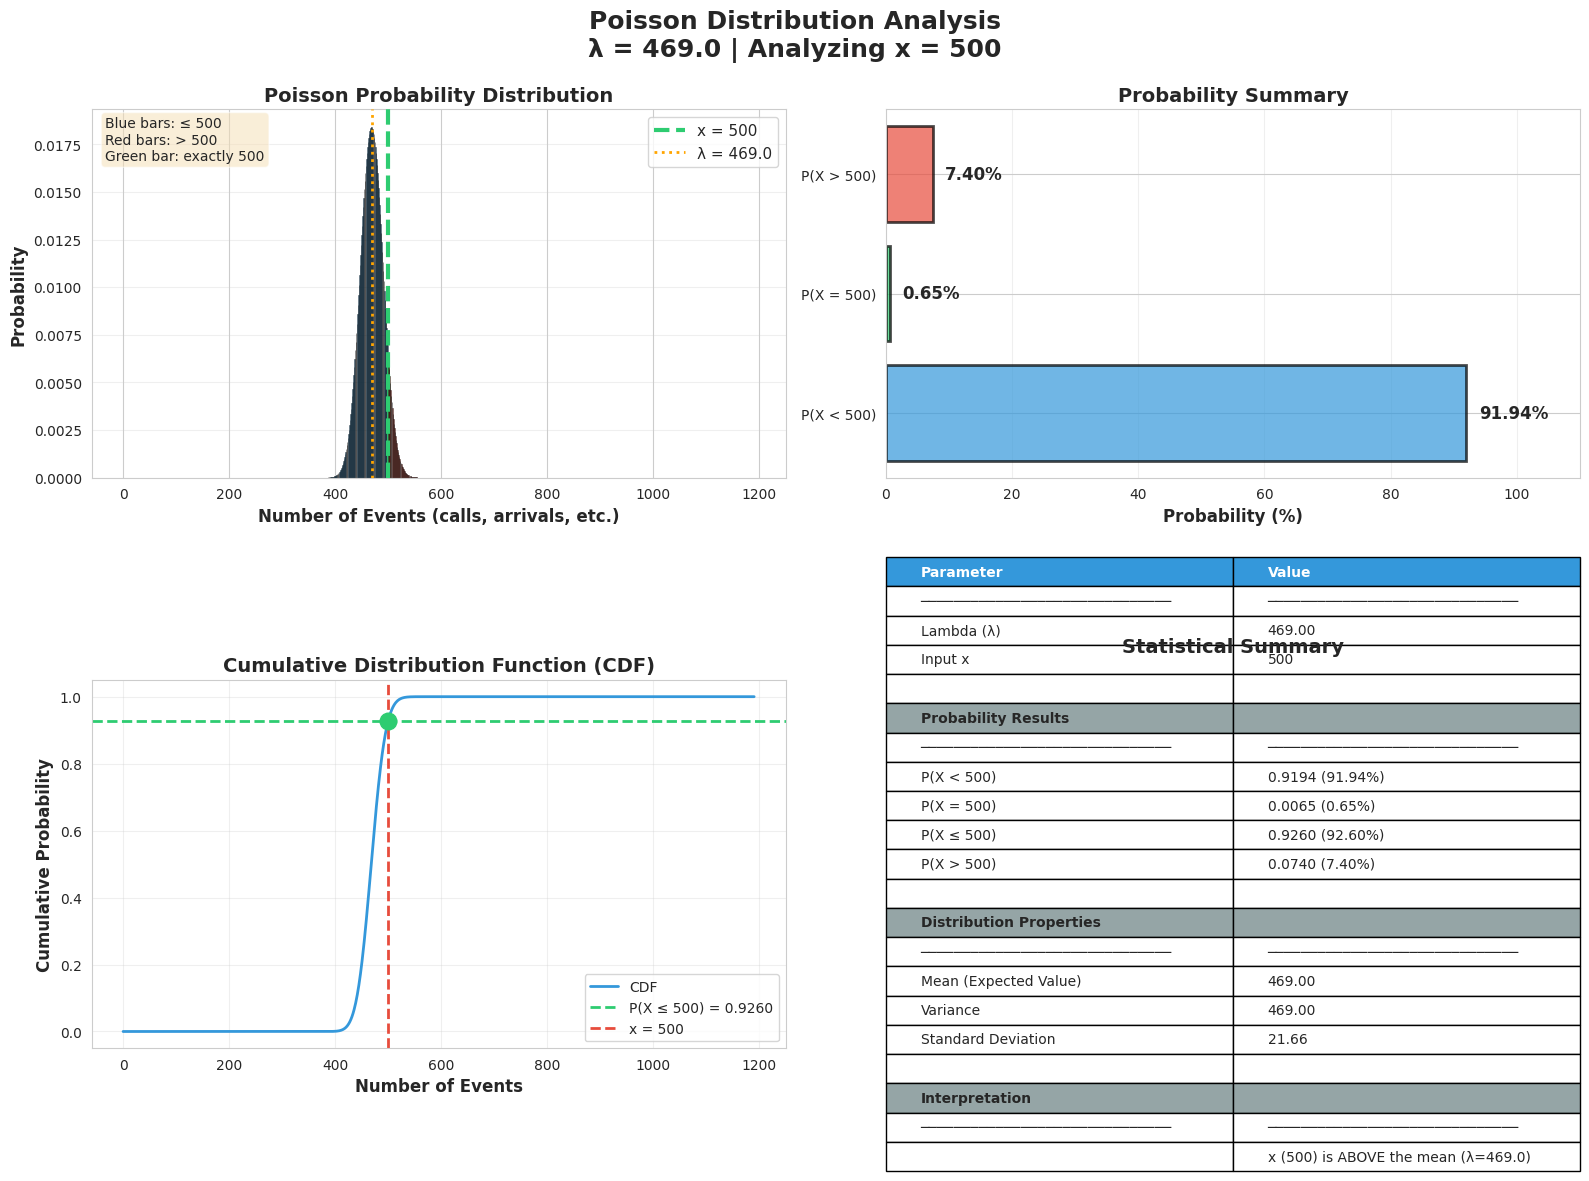

POISSON PROBABILITY CALCULATOR

Inputs:
  Lambda (λ): 469.0
  x value: 500

--------------------------------------------------------------------------------
PROBABILITY RESULTS:
--------------------------------------------------------------------------------
  P(X < 500)  = 0.919409  (91.9409%)
  P(X = 500)  = 0.006545  (0.6545%)
  P(X ≤ 500)  = 0.925954  (92.5954%)
  P(X > 500)  = 0.074046  (7.4046%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
  • There is a 91.94% chance of getting LESS than 500 events
  • There is a 7.40% chance of getting MORE than 500 events
  • The probability of getting exactly 500 events is 0.65%


COMPARISON SUMMARY

 Lambda   x P(X < x) P(X > x)
  713.0 550    0.00%  100.00%
  636.0 600    7.29%   92.14%
  569.0 525    2.98%   96.72%
  510.0 400    0.00%  100.00%
  469.0 500   91.94%    7.40%



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")

def poisson_probability_calculator(lambda_value, x_value):
    """
    Calculate Poisson probabilities for a given lambda and outcome x
    
    Parameters:
    - lambda_value: Average rate (e.g., average calls per hour)
    - x_value: Specific outcome to analyze (e.g., specific number of calls)
    
    Returns:
    - Dictionary with probabilities and generates visualization
    """
    
    # Input validation
    if lambda_value <= 0:
        raise ValueError("Lambda must be greater than 0")
    if x_value < 0:
        raise ValueError("x must be non-negative")
    
    # Calculate probabilities
    prob_less_than_x = poisson.cdf(x_value - 1, lambda_value) if x_value > 0 else 0
    prob_equal_to_x = poisson.pmf(x_value, lambda_value)
    prob_less_than_or_equal_x = poisson.cdf(x_value, lambda_value)
    prob_greater_than_x = 1 - prob_less_than_or_equal_x
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Poisson Distribution Analysis\nλ = {lambda_value} | Analyzing x = {x_value}', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    # ===== SUBPLOT 1: Full Distribution with x marked =====
    ax1 = axes[0, 0]
    
    # Generate range for distribution
    x_range = np.arange(0, int(lambda_value * 2.5) + 20)
    probabilities = poisson.pmf(x_range, lambda_value)
    
    # Color bars based on position relative to x_value
    colors = ['#3498db' if val <= x_value else '#e74c3c' for val in x_range]
    
    bars = ax1.bar(x_range, probabilities, color=colors, alpha=0.6, edgecolor='black', linewidth=0.5)
    
    # Highlight the specific x value
    if x_value < len(x_range):
        bars[x_value].set_color('#2ecc71')
        bars[x_value].set_alpha(1.0)
        bars[x_value].set_linewidth(2)
    
    # Add vertical line at x
    ax1.axvline(x=x_value, color='#2ecc71', linestyle='--', linewidth=3, 
                label=f'x = {x_value}', zorder=5)
    ax1.axvline(x=lambda_value, color='orange', linestyle=':', linewidth=2, 
                label=f'λ = {lambda_value}', zorder=5)
    
    ax1.set_xlabel('Number of Events (calls, arrivals, etc.)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Probability', fontsize=12, fontweight='bold')
    ax1.set_title('Poisson Probability Distribution', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11, loc='upper right')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add text annotation
    ax1.text(0.02, 0.98, f'Blue bars: ≤ {x_value}\nRed bars: > {x_value}\nGreen bar: exactly {x_value}',
             transform=ax1.transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # ===== SUBPLOT 2: Probability Summary Bars =====
    ax2 = axes[0, 1]
    
    categories = [f'P(X < {x_value})', f'P(X = {x_value})', f'P(X > {x_value})']
    probs = [prob_less_than_x * 100, prob_equal_to_x * 100, prob_greater_than_x * 100]
    colors_summary = ['#3498db', '#2ecc71', '#e74c3c']
    
    bars_summary = ax2.barh(categories, probs, color=colors_summary, alpha=0.7, edgecolor='black', linewidth=2)
    
    # Add percentage labels
    for i, (bar, prob) in enumerate(zip(bars_summary, probs)):
        width = bar.get_width()
        ax2.text(width + 2, bar.get_y() + bar.get_height()/2.,
                f'{prob:.2f}%',
                ha='left', va='center', fontweight='bold', fontsize=12)
    
    ax2.set_xlabel('Probability (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Probability Summary', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 110)
    ax2.grid(axis='x', alpha=0.3)
    
    # ===== SUBPLOT 3: Cumulative Distribution Function =====
    ax3 = axes[1, 0]
    
    x_range_cdf = np.arange(0, int(lambda_value * 2.5) + 20)
    cdf_values = poisson.cdf(x_range_cdf, lambda_value)
    
    ax3.plot(x_range_cdf, cdf_values, linewidth=2, color='#3498db', label='CDF')
    ax3.axhline(y=prob_less_than_or_equal_x, color='#2ecc71', linestyle='--', 
                linewidth=2, label=f'P(X ≤ {x_value}) = {prob_less_than_or_equal_x:.4f}')
    ax3.axvline(x=x_value, color='#e74c3c', linestyle='--', linewidth=2, 
                label=f'x = {x_value}')
    
    # Mark the point
    ax3.plot(x_value, prob_less_than_or_equal_x, 'o', color='#2ecc71', 
             markersize=12, zorder=5)
    
    ax3.set_xlabel('Number of Events', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
    ax3.set_title('Cumulative Distribution Function (CDF)', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(alpha=0.3)
    ax3.set_ylim(-0.05, 1.05)
    
    # ===== SUBPLOT 4: Key Statistics Table =====
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Create statistics table
    stats_data = [
        ['Parameter', 'Value'],
        ['─' * 30, '─' * 30],
        ['Lambda (λ)', f'{lambda_value:.2f}'],
        ['Input x', f'{x_value}'],
        ['', ''],
        ['Probability Results', ''],
        ['─' * 30, '─' * 30],
        [f'P(X < {x_value})', f'{prob_less_than_x:.4f} ({prob_less_than_x*100:.2f}%)'],
        [f'P(X = {x_value})', f'{prob_equal_to_x:.4f} ({prob_equal_to_x*100:.2f}%)'],
        [f'P(X ≤ {x_value})', f'{prob_less_than_or_equal_x:.4f} ({prob_less_than_or_equal_x*100:.2f}%)'],
        [f'P(X > {x_value})', f'{prob_greater_than_x:.4f} ({prob_greater_than_x*100:.2f}%)'],
        ['', ''],
        ['Distribution Properties', ''],
        ['─' * 30, '─' * 30],
        ['Mean (Expected Value)', f'{lambda_value:.2f}'],
        ['Variance', f'{lambda_value:.2f}'],
        ['Standard Deviation', f'{np.sqrt(lambda_value):.2f}'],
        ['', ''],
        ['Interpretation', ''],
        ['─' * 30, '─' * 30],
    ]
    
    # Add interpretation
    if x_value < lambda_value:
        interpretation = f'x ({x_value}) is BELOW the mean (λ={lambda_value})'
    elif x_value > lambda_value:
        interpretation = f'x ({x_value}) is ABOVE the mean (λ={lambda_value})'
    else:
        interpretation = f'x ({x_value}) equals the mean (λ={lambda_value})'
    
    stats_data.append(['', interpretation])
    
    # Create table
    table = ax4.table(cellText=stats_data, cellLoc='left', loc='center',
                      colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Style header row
    for i in range(2):
        table[(0, i)].set_facecolor('#3498db')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Style section headers
    for row_idx in [5, 12, 18]:
        if row_idx < len(stats_data):
            table[(row_idx, 0)].set_facecolor('#95a5a6')
            table[(row_idx, 0)].set_text_props(weight='bold')
            table[(row_idx, 1)].set_facecolor('#95a5a6')
    
    ax4.set_title('Statistical Summary', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    #import osos.makedirs('/mnt/user-data/outputs/', exist_ok=True)
    #plt.savefig('/mnt/user-data/outputs/poisson_probability.png', dpi=300, bbox_inches='tight')

    plt.show()
    
    # Print console output
    print("=" * 80)
    print("POISSON PROBABILITY CALCULATOR")
    print("=" * 80)
    print(f"\nInputs:")
    print(f"  Lambda (λ): {lambda_value}")
    print(f"  x value: {x_value}")
    print("\n" + "-" * 80)
    print("PROBABILITY RESULTS:")
    print("-" * 80)
    print(f"  P(X < {x_value})  = {prob_less_than_x:.6f}  ({prob_less_than_x*100:.4f}%)")
    print(f"  P(X = {x_value})  = {prob_equal_to_x:.6f}  ({prob_equal_to_x*100:.4f}%)")
    print(f"  P(X ≤ {x_value})  = {prob_less_than_or_equal_x:.6f}  ({prob_less_than_or_equal_x*100:.4f}%)")
    print(f"  P(X > {x_value})  = {prob_greater_than_x:.6f}  ({prob_greater_than_x*100:.4f}%)")
    print("\n" + "-" * 80)
    print("INTERPRETATION:")
    print("-" * 80)
    print(f"  • There is a {prob_less_than_x*100:.2f}% chance of getting LESS than {x_value} events")
    print(f"  • There is a {prob_greater_than_x*100:.2f}% chance of getting MORE than {x_value} events")
    print(f"  • The probability of getting exactly {x_value} events is {prob_equal_to_x*100:.2f}%")
    print("=" * 80)
    
    # Return results as dictionary
    return {
        'lambda': lambda_value,
        'x': x_value,
        'prob_less_than_x': prob_less_than_x,
        'prob_equal_to_x': prob_equal_to_x,
        'prob_less_than_or_equal_x': prob_less_than_or_equal_x,
        'prob_greater_than_x': prob_greater_than_x,
        'mean': lambda_value,
        'variance': lambda_value,
        'std_dev': np.sqrt(lambda_value)
    }


# ===== EXAMPLE USAGE =====
if __name__ == "__main__":
    print("\n" + "="*80)
    print(f"Monday: Average {monday_call_counts}, analyzing x = 550 calls")
    print("="*80)
    
    monday_result = poisson_probability_calculator(lambda_value=monday_call_counts, x_value=550)
    
    print("\n\n" + "="*80)
    print("Tuesday: Average {tuesday_call_counts}, analyzing x = 600 calls")
    print("="*80)
    
    tuesday_result = poisson_probability_calculator(lambda_value=tuesday_call_counts, x_value=600)
    
    print("\n\n" + "="*80)
    print("Wednesday: Average {wednesday_call_counts}, analyzing x = 525 calls")
    print("="*80)
    
    wednesday_result = poisson_probability_calculator(lambda_value=wednesday_call_counts, x_value=525)

    print("\n\n" + "="*80)
    print("Thursday: Average {thursday_call_counts}, analyzing x = 400 calls")
    print("="*80)

    thursday_result = poisson_probability_calculator(lambda_value=thursday_call_counts, x_value=400)

    print("\n\n" + "="*80)
    print(f"Friday: Average {friday_call_counts}, analyzing x = 500 calls")
    print("="*80)

    friday_result = poisson_probability_calculator(lambda_value=friday_call_counts, x_value=500)        
    
    print("\n\n" + "="*80)
    print("COMPARISON SUMMARY")
    print("="*80)
    
    comparison_df = pd.DataFrame([
        {
            'Lambda': monday_result['lambda'],
            'x': monday_result['x'],
            'P(X < x)': f"{monday_result['prob_less_than_x']*100:.2f}%",
            'P(X > x)': f"{monday_result['prob_greater_than_x']*100:.2f}%"
        },
        {
            'Lambda': tuesday_result['lambda'],
            'x': tuesday_result['x'],
            'P(X < x)': f"{tuesday_result['prob_less_than_x']*100:.2f}%",
            'P(X > x)': f"{tuesday_result['prob_greater_than_x']*100:.2f}%"
        },
        {
            'Lambda': wednesday_result['lambda'],
            'x': wednesday_result['x'],
            'P(X < x)': f"{wednesday_result['prob_less_than_x']*100:.2f}%",
            'P(X > x)': f"{wednesday_result['prob_greater_than_x']*100:.2f}%"
        },
        {
            'Lambda': thursday_result['lambda'],
            'x': thursday_result['x'],
            'P(X < x)': f"{thursday_result['prob_less_than_x']*100:.2f}%",
            'P(X > x)': f"{thursday_result['prob_greater_than_x']*100:.2f}%"
        },
        {
            'Lambda': friday_result['lambda'],
            'x': friday_result['x'],
            'P(X < x)': f"{friday_result['prob_less_than_x']*100:.2f}%",
            'P(X > x)': f"{friday_result['prob_greater_than_x']*100:.2f}%"
        }
    ])
    
    print("\n" + comparison_df.to_string(index=False))
    print("\n" + "="*80)